# Predicting Email Spam Using Keyword Checking

**DSCI 100 group 162** : Sarah Hoang, Euna Ao, Siddhanth Duggal

## Introduction

### Background Information:

Spam emails are unsolicited messages sent in bulk with malicious intent. Diverse in nature, spam emails can come in form of advertisements for products/websites, make-money-fast schemes, chain letters, pornography. In addition to wasting the receiver’s time and resources, spam emails make users susceptible to scams and security breaches, thereby, putting them at risk of stolen information and losing money (Ahmed, 2022). 

### Research Question:

Can we predict whether an email is spam or not-spam based on the frequency of exclamation marks, frequency of dollar signs, and frequency of brackets within the email?

### Information on Dataset:

This dataset consists of information derived from 4601 emails that are classified as either spam or not-spam. Collected by Hopkins et al. from the Hewlett-Packard lab in 1997, this dataset is split into two classifications of email: 

1) Spam emails, which was created by accumulating spam emails failed by individuals and post masters and 

2) Non-spam emails, which was created by personal and work emails donated by George Forman. 

This dataset contains information about 57 continuous real variables, and contains one class-label column to denote whether the email is spam or not. As the non-spam emails were donated by George Forman, words such as "george" and "650" indicate non-spam emails. No relevant papers are derived from this dataset. 


# Preliminary Exploratory Data Analysis

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### 1. Load Data into R

In [4]:
data <- read_csv("https://raw.githubusercontent.com/SarahHoang/dsci-100-project-group-162/main/spambase.data", 
                      col_names = FALSE)

Rows: 4601 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (58): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
data

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.30,0,0.30,0,0.00,0,0,0,0,0,⋯,0.102,0.718,0,0.000,0,0,1.404,6,118,0
0.96,0,0.00,0,0.32,0,0,0,0,0,⋯,0.000,0.057,0,0.000,0,0,1.147,5,78,0
0.00,0,0.65,0,0.00,0,0,0,0,0,⋯,0.000,0.000,0,0.125,0,0,1.250,5,40,0


### 2. Cleaning and Wrangling data into Tidy Format

After reading our dataset from the web, we will clean and wrangle the data into tidy format. This includes renaming the columns and mutating the classiification label to a factor. We also added serial numbers to every observation and removed rows containing missing values. We are keeping all predictor variables as we will need them all to later determine which predictor variables are appropriate for our model. 

In [6]:
#generating column names for our dataset
clean_data <- tibble::rowid_to_column(data)

#generating column names for our dataset
column_names <- read_delim("https://raw.githubusercontent.com/SarahHoang/dsci-100-project-group-162/main/spambase.names", 
                         skip = 33,
                        col_names = FALSE) |> 
                        select(X1) |>
                        rename("col_name" = X1)

col <- toString(column_names)

colnames(clean_data) <- c("ID", "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", 
  "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
  "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", 
  "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", 
  "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
  "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", 
  "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", 
  "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", 
  "char_freq_semicolon", "char_freq_bracket", "char_freq_squarebracket", "char_freq_exclamation", 
                          "char_freq_dollar", "char_freq_hashtag", "capital_run_length_average", 
  "capital_run_length_longest", "capital_run_length_total", "spam_indicator")


#Changing class label from dbl to factor

clean_data <- clean_data |>
   mutate(spam_indicator = as_factor(spam_indicator))

            

Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
clean_data

ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,⋯,char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_indicator
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4599,0.30,0,0.30,0,0.00,0,0,0,0,⋯,0.102,0.718,0,0.000,0,0,1.404,6,118,0
4600,0.96,0,0.00,0,0.32,0,0,0,0,⋯,0.000,0.057,0,0.000,0,0,1.147,5,78,0
4601,0.00,0,0.65,0,0.00,0,0,0,0,⋯,0.000,0.000,0,0.125,0,0,1.250,5,40,0


### 3. Split Data into Training and Testing Datasets (Display table: Training Data)

We split the dataset into a training and testing dataset. We also set the seed to ensure reproducability. We used a prop value of 0.75, meaning that 75% of our data was allocated as training data, while the remaining 25% of the data will be our testing data. The testing data is set aside. 

In [8]:
set.seed(6666)

data_split <- initial_split(clean_data, prop = 0.75, strata = spam_indicator)
data_train <- training(data_split)
data_test <- testing(data_split)

In [9]:
data_train

ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,⋯,char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_indicator
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1814,0,0,0,0,0,0,0,0,0,⋯,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,0
1815,0,0,0,0,0,0,0,0,0,⋯,0.299,0.000,0.000,0.149,0.000,0.000,1.040,2,26,0
1816,0,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1811,0,0.00,0.77,0,0.38,0.38,0.38,0.00,0.00,⋯,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,1
1812,0,0.00,0.00,0,0.53,0.00,0.53,0.00,0.53,⋯,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,1
1813,0,0.31,0.42,0,0.00,0.10,0.00,0.52,0.21,⋯,0.000,0.016,0.000,0.887,0.032,0.049,3.446,318,1003,1


### 4. Exploratory Data Analysis using Training Dataset

#### 4.1 Tables

In [10]:
data_counts <- data_train %>%
group_by(spam_indicator) %>%
    summarize(count = n())

In [11]:
data_counts

spam_indicator,count
<fct>,<int>
0,2091
1,1359


From this table, we can see that the training data has a good distribution of spam and non-spam emails. This indicates the original dataset was stratified, and that there are enough observations of both spam and non-spam to train our model.


In [12]:
data_train_mean <- data_train %>%
    summarize(char_freq_exclamation_mean = mean(char_freq_exclamation),
          char_freq_dollar_mean = mean(char_freq_dollar),
          char_freq_hashtag_mean = mean(char_freq_hashtag),
            char_freq_bracket_mean = mean(char_freq_bracket))

In [13]:
data_train_mean

char_freq_exclamation_mean,char_freq_dollar_mean,char_freq_hashtag_mean,char_freq_bracket_mean
<dbl>,<dbl>,<dbl>,<dbl>
0.2749861,0.07395942,0.04120406,0.1396745


From this table, we can see that the means are not well-centered and well-scaled, as the means are not within a similar range. This indicates that we must scale and center our data for future processing. 

In [14]:
data_train_max <- data_train %>% 
    summarize(char_freq_exclamation_max = max(char_freq_exclamation),
          char_freq_dollar_max = max(char_freq_dollar),
          char_freq_hashtag_max = max(char_freq_hashtag),
              char_freq_bracket_max = max(char_freq_bracket))


data_train_min <- data_train %>%
    summarize(char_freq_exclamation_min = min(char_freq_exclamation),
          char_freq_dollar_min = min(char_freq_dollar),
          char_freq_hashtag_min = min(char_freq_hashtag),
              char_freq_bracket_min = min(char_freq_bracket))

In [15]:
data_train_max

char_freq_exclamation_max,char_freq_dollar_max,char_freq_hashtag_max,char_freq_bracket_max
<dbl>,<dbl>,<dbl>,<dbl>
32.478,5.3,19.829,9.752


In [16]:
data_train_min

char_freq_exclamation_min,char_freq_dollar_min,char_freq_hashtag_min,char_freq_bracket_min
<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0


From these two tables, we can see that the observations are not well scaled,, as the maximum values fall within a large scale. This indicuates that we should scale our data for future processing, as there are differing ranges between the variables.

#### 4.2 Data visualization (scatter plot)

In [17]:
train_plot <- ggpairs(data_train, columns = 50:55, 
                      title = "Exploratory data analysis using selected predictors",
                      ggplot2::aes(colour=spam_indicator))

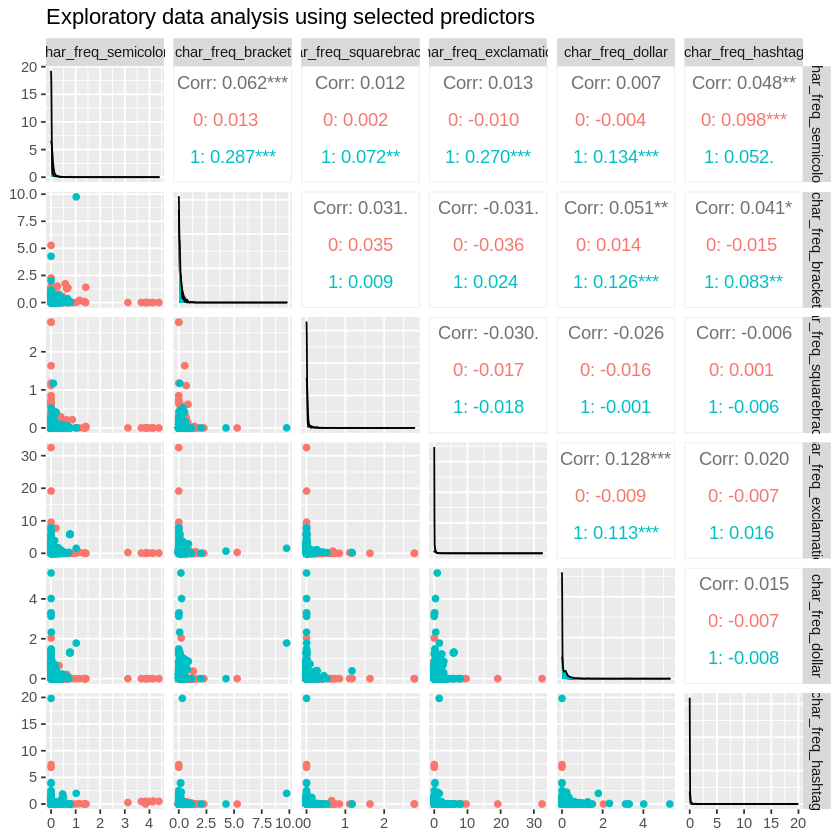

In [18]:
train_plot

## Methods

Using **forward selection** to determine the most accurate attributes to detect spam emails. 

Our predictor variables are `char_freq_exclamation`, `char_freq_bracket`, `char_freq_dollar`. Our `spam_indicator` is the class label, in which it denotes whether the email is spam (1) or not-spam (0). 

### 5. Choosing our Predictors with Forward Selection

#### 5.1 Preparations
A tibble is created to store our results to proceed with forward selection. We created our model specificiation for this project. We will be using this same model for the rest of the project.The 5-fold cross-validation object is created.

In [12]:
set.seed(6666)

# extract names for our predict values
data_subset <- data_train |>
  select("char_freq_semicolon", "char_freq_bracket", "char_freq_squarebracket", "char_freq_exclamation", 
        "char_freq_dollar", "char_freq_hashtag", "spam_indicator")
data_subset

names <- colnames(data_subset |> select(-spam_indicator))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
data_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
data_vfold <- vfold_cv(data_subset, v = 5, strata = spam_indicator)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,spam_indicator
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.022,0.022,0.019,0.022,0.022,0.022,0
0.299,0.000,0.000,0.149,0.000,0.000,0
0.000,0.000,0.000,0.000,0.000,0.000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.063,0.127,0.255,0.510,0.000,0.000,1
0.000,0.000,0.000,0.082,0.000,0.000,1
0.000,0.016,0.000,0.887,0.032,0.049,1


#### 5.2 Forward Selection Results

Referring to the forward selection results, we can conclude which predictor variables we will use. From the forward selection results, we have selected`char_freq_exclamation`,  `char_freq_dollar`, `char_freq_bracket` as the most accurate predictors as they have a combined accuracy of ~85%. While other combinations may have higher accuracies (ie. `char_freq_exclamation`, `char_freq_dollar`, `char_freq_hashtag`), there is only a minor increase in accuracy despite the complexity needed to introduce another predictor variable. Therefore, we select `char_freq_exclamation`,  `char_freq_dollar`, and `char_freq_bracket` as our predictor variables moving forward.

In [15]:
set.seed(6666)
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("spam_indicator", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        data_recipe <- recipe(as.formula(model_string), 
                                data = data_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(data_recipe) |>
          add_model(data_spec) |>
          tune_grid(resamples = data_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,spam_indicator ~ char_freq_exclamation,0.7860842
2,spam_indicator ~ char_freq_exclamation+char_freq_dollar,0.8431883
3,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket,0.8507258
4,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag,0.8542049
5,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag+char_freq_semicolon,0.8547812
6,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag+char_freq_semicolon+char_freq_squarebracket,0.8533324


### 6. Example Data Analysis 

Finding the best K-nearest neighbor value using our three selected values `char_freq_exclamation`,  `char_freq_dollar`, `char_freq_bracket`. Afterwards, we will tune our model using **k = 11**,  fit our model to training data set using `fit()`, train using our `data_train`, and then predict using our `data_test`. Finally we will use `collect.metrics()` to determine the accuracy of our model. 

In [15]:
set.seed(6666)

spam_vfold <- vfold_cv(data_train, v=5, strata = spam_indicator)

spam_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

spam_recipe <- recipe(spam_indicator ~ char_freq_exclamation + char_freq_dollar + char_freq_bracket, data= data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors()) |>
            prep()

spam_fit <- workflow() |>
        add_recipe(spam_recipe) |>
        add_model(spam_tune) |>
        tune_grid(resamples = spam_vfold, grid =10) |>
        collect_metrics()

accuracies <- spam_fit |>
    filter(.metric == "accuracy") |>
    arrange(-mean) |>
    slice(1)
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.8507258,5,0.007648496,Preprocessor1_Model7


### 7. Example of Result Visualization

After completing our model and testing it on the test dataset, we will create a confusion matrix to compare how observations were classified correctly and how many were incorrectly classified. This will give insight into the accuracy of our model as well as insight into what types of errors are being made. For example, a classification matrix will indicates whether our model is prone to false positives (non-spam email classified as spam) or false negatives (spam email classified as non-spam).  

## Expected outcomes and significance

### Expected Findings

We predict that emails with high frequencies of our predictor variables (ie. dollar signs, brackets, and exclamation marks) are indicative of the email being classified as spam. 


### Impact of Findings

Our results provide evidence to support the recognition of frequency of punctuations like exclamation mark, brackets and dollar sign as the leading candidates in keyword checking approach in spam email detection.

This however could make scammer more aware and adapt to not utilize these attributions. Nonetheless, our model could help mail users avoid harmful spam emails.

### Future Questions

- How applicable is this model to other information sharing platform like social media posts and DMs?

- How does the number of attributes affect the accuracy of our model?

# References

- Ahmed, Naeem, et al. “Machine Learning Techniques for Spam Detection in Email and IOT Platforms: Analysis and Research Challenges.” Security and Communication Networks, vol. 2022, 2022, pp. 1–19., https://doi.org/10.1155/2022/1862888. 